# Predicting Employee Attrition using HR Dataset

## Technologies use - 
## Python, Pandas, Matplotlib, Seaborn, Scikit-learn, Gradient Boosting Classifier model

## Step 1 - Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

## Step 2 - Load Dataset

In [2]:
data=pd.read_csv(r"C:\Users\HARSHIT VARTAK\Downloads\HR Dataset.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# get top 5 rows

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# get bottom 5 rows

data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
# get mor information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# get summary

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# avg of stay and left employee

left = data.groupby('left')     # 0 = stay
left.mean()                     # 1 = left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Step 3 - EDA

### Bar Plot using Matplotlib

### Employees Left

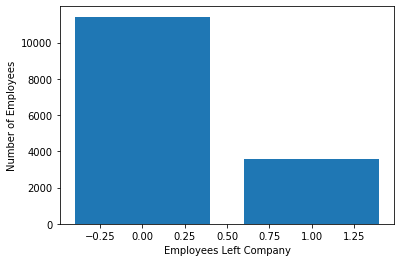

In [8]:
# check how many employees were left

left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [9]:
# get value counts

data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed.

### Number of Projects

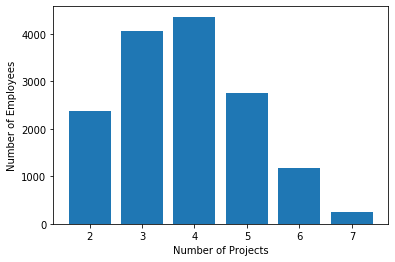

In [10]:
# number of employees deployed on How many projects

num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

### Time Spent in Company

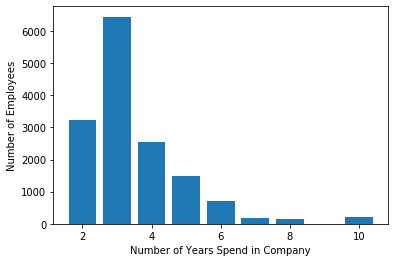

In [11]:
# number of employees have based on how much experience

time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

### Subplots using Seaborn

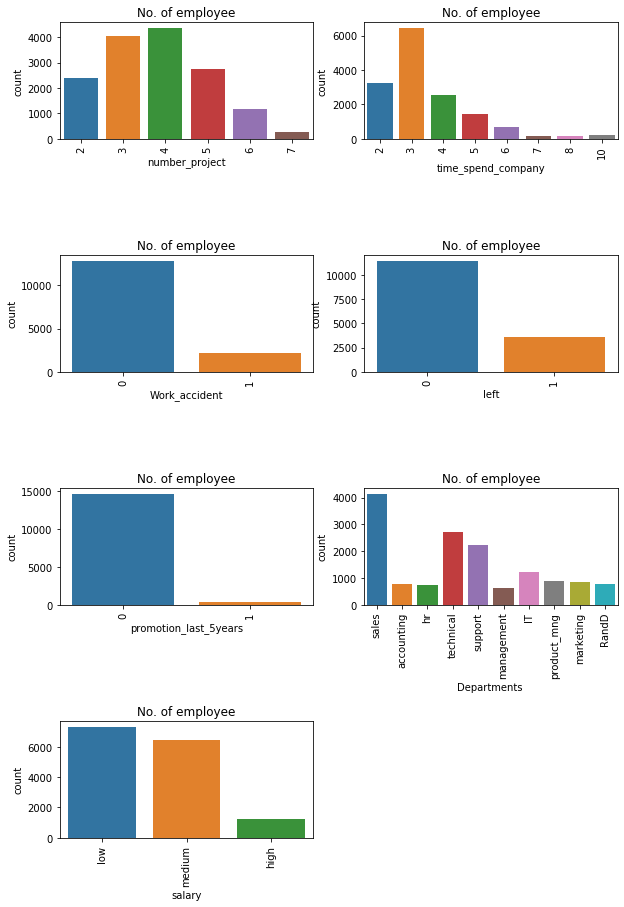

In [12]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))       # figure size
for i, j in enumerate(features):        # for loop
    plt.subplot(4, 2, i+1)              # row, column
    plt.subplots_adjust(hspace = 1.0)   # height space
    sns.countplot(x=j,data = data)      # data
    plt.xticks(rotation=90)             # X axis rotation
    plt.title("No. of employee")        # title name

You can observe the following points in the above visualization:

- Most of the employee is doing the project from 3-5.

- There is a huge drop between 3 years and 4 years experienced employee.

- The no of employee left is 23 % of the total employment.

- A decidedly less number of employee get the promotion in the last 5 year.

- The sales department is having maximum no.of employee followed by technical and support

- Most of the employees are getting salary either medium or low.

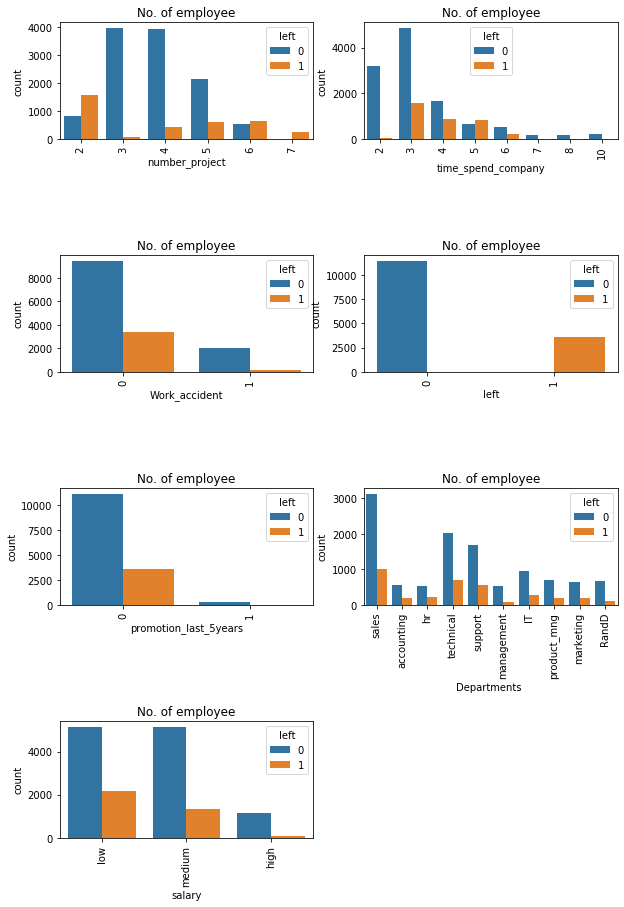

In [13]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

- Those employees who have the number of projects more than 5 were left the company.
- The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
- The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
- Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

## Cluster Analysis

In [14]:
#import module

from sklearn.cluster import KMeans

In [15]:
# Filter data

left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

In [16]:
# Create groups using K-means clustering

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

In [17]:
# Add new column "label" annd assign cluster labels

left_emp['label'] = kmeans.labels_

### Scatter Plot

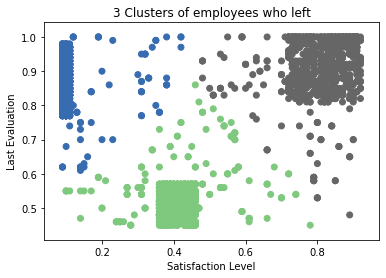

In [18]:
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

- High Satisfaction and High Evaluation(Shaded by green color in the graph)
- Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph)
- Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph)

## Building a Prediction Model

### Pre-Processing Data

- Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

- In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2.

- This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [19]:
# Import LabelEncoder

from sklearn import preprocessing

In [20]:
#creating labelEncoder

le = preprocessing.LabelEncoder()

In [21]:
# Converting string labels into numbers

data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

### Split Train and Test Set

In [22]:
#Spliting data into Feature

X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [23]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

In [24]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

### Model Building

### predict using Gradient Boosting Classifier.

In [25]:
#Import Gradient Boosting Classifier model

from sklearn.ensemble import GradientBoostingClassifier

In [26]:
#Create Gradient Boosting Classifier

gb = GradientBoostingClassifier()

In [27]:
#Train the model using the training sets

gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
#Predict the response for test dataset

y_pred = gb.predict(X_test)

## Evaluating Model Performance

In [29]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

In [30]:
# Model Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Model Precision

print("Precision:",metrics.precision_score(y_test, y_pred))


# Model Recall

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9713333333333334
Precision: 0.9573229873908826
Recall: 0.9207089552238806


- Accuracy = 97%
- Precision = 95%
- Recall = 92%